# Event display


### Nov 2020, JAH

In [124]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [125]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [126]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.display       as nplay

In [127]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Thu Nov 19 11:59:18 2020


### load data

In [348]:
def get_chits_filename(run_number, label = 'ds_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename

def hits(hh, ene = 'Ec'):
    scale = 1. if ene == 'E' else 1.e3
    xe = scale * hh[ene].values
    xe[np.isnan(xe)] = 0.
    return hh.X.values, hh.Y.values, hh.Z.values, xe

In [345]:
fname = get_chits_filename(8182)
print(fname)
ddh    = pd.read_hdf(fname, 'CHITs.lowTh')
dde    = ddh.groupby('event')
events = np.unique(ddh.event.values)
print('total events ', len(events))

/home/hernando/data/NEW/chits_ds_rough_8182.h5
total events  2760


In [347]:
ddh

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,311,1.602604e+09,0,71.804477,-4.516273,1,75.0,-5.0,0.0,0.0,232.378713,11.466354,207.362455,-1.0,0.000804,-1,-1.0
1,311,1.602604e+09,0,71.804477,-4.516273,1,65.0,-5.0,0.0,0.0,232.378713,9.508168,171.949779,-1.0,0.000658,-1,-1.0
2,311,1.602604e+09,0,71.804477,-4.516273,1,85.0,5.0,0.0,0.0,232.378713,7.788881,140.857459,-1.0,0.000552,-1,-1.0
3,311,1.602604e+09,0,71.804477,-4.516273,1,85.0,-5.0,0.0,0.0,232.378713,7.362239,133.141875,-1.0,0.000522,-1,-1.0
4,311,1.602604e+09,0,71.804477,-4.516273,1,65.0,5.0,0.0,0.0,232.378713,6.791595,122.822099,-1.0,0.000471,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061354,2621895,1.602688e+09,0,76.488142,18.951034,1,105.0,35.0,0.0,0.0,255.008522,8.347710,155.514324,-1.0,0.000647,-1,-1.0
2061355,2621895,1.602688e+09,0,76.488142,18.951034,1,105.0,5.0,0.0,0.0,255.008522,7.884620,146.887162,-1.0,0.000599,-1,-1.0
2061356,2621895,1.602688e+09,0,76.488142,18.951034,1,115.0,5.0,0.0,0.0,255.008522,7.209332,134.306835,-1.0,0.000555,-1,-1.0
2061357,2621895,1.602688e+09,0,76.488142,18.951034,1,95.0,5.0,0.0,0.0,255.008522,6.578020,122.545751,-1.0,0.000486,-1,-1.0


In [740]:
def draw_event(event = None):
    event = np.random.choice(events, 1)[0] if event is None else event
    print('event ', event)
    hh    = dde.get_group(event)
    x, y, z, erec = hits(hh)
    x, y, z, eraw = hits(hh, 'E')
    
    nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet');
    nplay.wf(x, y, z, erec, cmap = 'jet');
    nplay.wf(x, y, z, eraw, cmap = 'jet');
    nplay.wfcalib(x, y, z, erec, eraw, cmap = 'jet')
    

event  543247


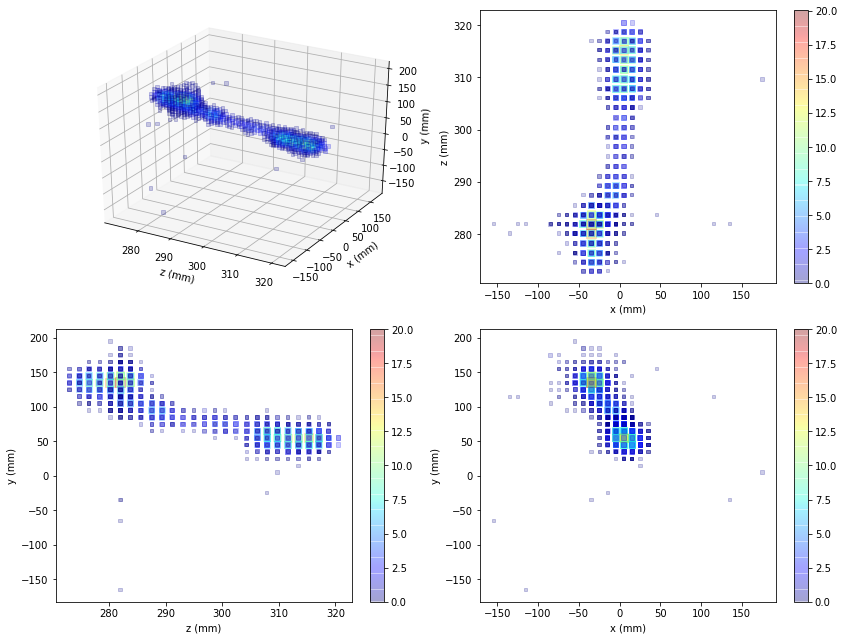

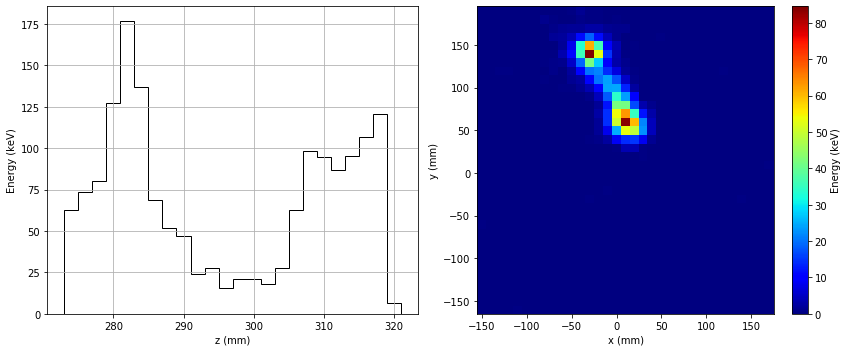

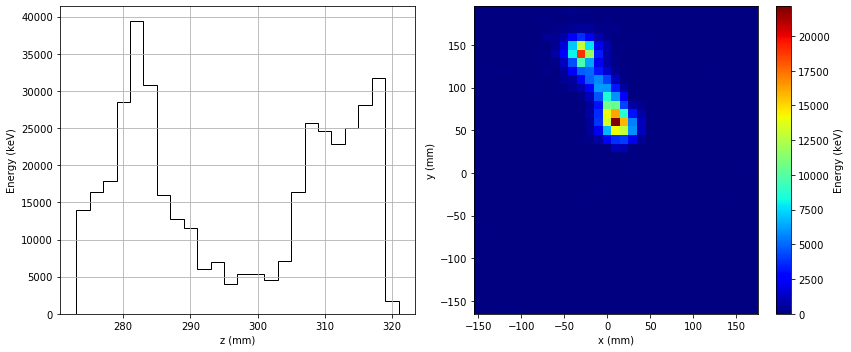

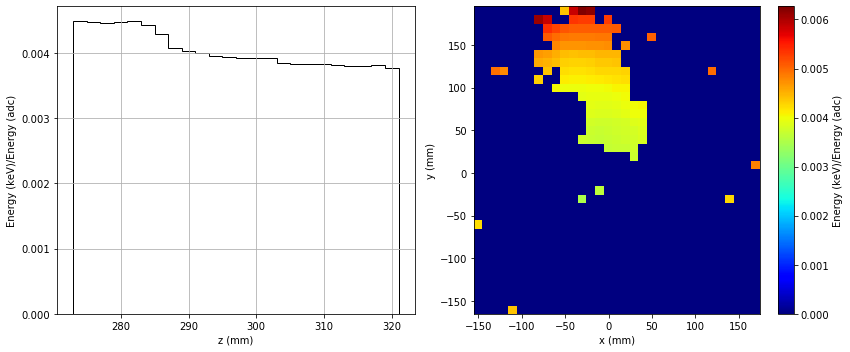

In [741]:
xevents = [1241463, 981141, 2300475, 920693, 543247]
draw_event(543247)

event  543247


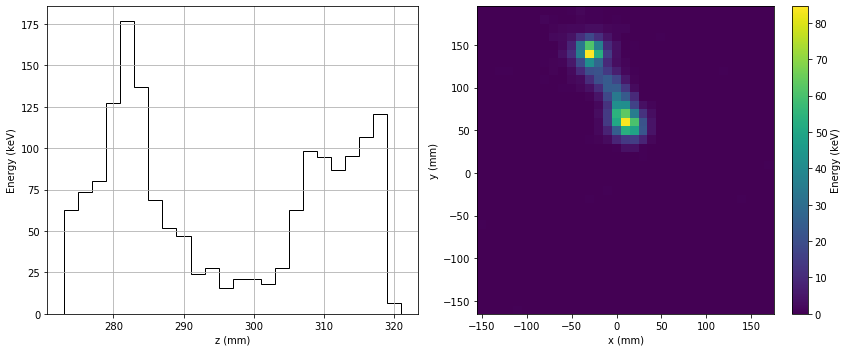

In [738]:
event = np.random.choice(events, 1)[0]
print('event ', event)
hh    = dde.get_group(event)
x, y, z, erec = hits(hh)
nplay.wf(x, y, z, erec)